In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
cd /content/MyDrive/MyDrive/openknowl/data

/content/MyDrive/MyDrive/openknowl/data


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

In [ ]:
trdata = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.2)


traindata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224), subset='training')

valdata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224),subset="validation" ,)




Found 710 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


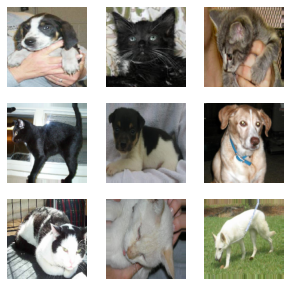

In [ ]:
import matplotlib.pyplot as plt

x_train, y_train = traindata.next()
plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")

VGG Architecture

In [ ]:
VGG = tf.keras.applications.VGG16(input_shape=(224,224,3), include_top = False, weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG.trainable = False

In [ ]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               6422784   
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#  model = Sequential()

#  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

#  model.add(Flatten())
#  model.add(Dense(units=256,activation="relu"))
#  model.add(Dense(units=256,activation="relu"))
#  model.add(Dense(units=2, activation="softmax"))


In [ ]:

adam = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(traindata, epochs = 10,   validation_data=valdata,)

Epoch 1/10
23/23 [==============================] - 310s 13s/step - loss: 0.6111 - accuracy: 0.6718 - val_loss: 0.5422 - val_accuracy: 0.7955
Epoch 2/10
23/23 [==============================] - 12s 532ms/step - loss: 0.4673 - accuracy: 0.8225 - val_loss: 0.4605 - val_accuracy: 0.8182
Epoch 3/10
23/23 [==============================] - 13s 547ms/step - loss: 0.3953 - accuracy: 0.8549 - val_loss: 0.4285 - val_accuracy: 0.8352
Epoch 4/10
23/23 [==============================] - 12s 542ms/step - loss: 0.3389 - accuracy: 0.8732 - val_loss: 0.3920 - val_accuracy: 0.8409
Epoch 5/10
23/23 [==============================] - 12s 540ms/step - loss: 0.3080 - accuracy: 0.8887 - val_loss: 0.3416 - val_accuracy: 0.8864
Epoch 6/10
23/23 [==============================] - 12s 539ms/step - loss: 0.2811 - accuracy: 0.8972 - val_loss: 0.3617 - val_accuracy: 0.8352
Epoch 7/10
23/23 [==============================] - 12s 532ms/step - loss: 0.2660 - accuracy: 0.8986 - val_loss: 0.3628 - val_accuracy: 0.8693


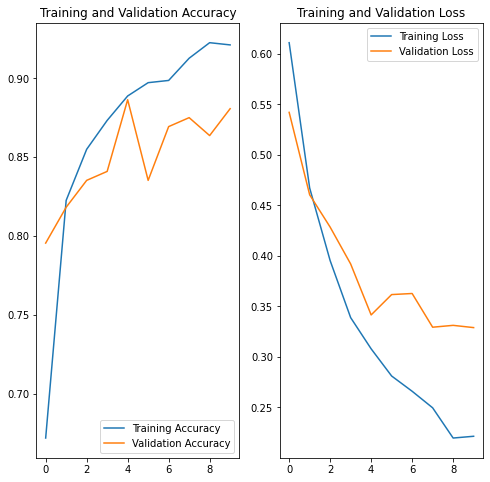

In [ ]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()